# Install Dependencies and Setup

In [1]:
import sys
print("Python executable:", sys.executable)

Python executable: C:\Users\Blessing Austin\OneDrive - montclair.edu\Desktop\MSU\SETUP\ImageClassification\imageclassification\Scripts\python.exe


In [2]:
!pip list

Package                           Version
--------------------------------- ------------
absl-py                           2.1.0
aiobotocore                       2.7.0
aiohttp                           3.9.3
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.12
alembic                           1.13.0
altair                            5.0.1
anaconda-anon-usage               0.4.3
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.1.4
anaconda-navigator                2.5.2
anaconda-project                  0.11.1
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.1
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           5.3.4
asttokens               

In [3]:
import tensorflow as tf
import os

In [4]:
os.listdir('data')

['BIT', 'HYDRO POWER', 'NATURAL GAS', 'SOLAR']

In [5]:
gpus = tf.config.experimental.list_physical_devices('CPU')
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
tf.config.list_physical_devices('GPU')

[]

# Cleaning Up The Images

In [8]:
import cv2
import imghdr
from matplotlib import pyplot as plt

C:\Users\Blessing Austin\AppData\Local\Temp\ipykernel_32040\3427753027.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [9]:
img = cv2.imread(os.path.join('data','BIT','naip_151_AL_BIT.png'))
img.shape

(1114, 1114, 3)

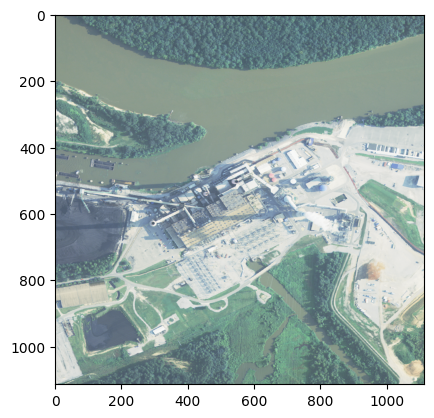

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [11]:
data_dir = 'data' 

In [12]:
os.listdir(data_dir)

['BIT', 'HYDRO POWER', 'NATURAL GAS', 'SOLAR']

In [13]:
os.listdir(os.path.join(data_dir,'HYDRO POWER'))

['naip_1015_CA_WAT.png',
 'naip_1019_CA_WAT.png',
 'naip_1020_CA_WAT.png',
 'naip_1053_CA_WAT.png',
 'naip_1062_CA_WAT.png',
 'naip_1063_CA_WAT.png',
 'naip_1074_CA_WAT.png',
 'naip_1098_CA_WAT.png',
 'naip_1107_CA_WAT.png',
 'naip_1127_CA_WAT.png',
 'naip_1136_CA_WAT.png',
 'naip_1142_CA_WAT.png',
 'naip_1155_CA_WAT.png',
 'naip_1159_CA_WAT.png',
 'naip_1171_CA_WAT.png',
 'naip_1180_CA_WAT.png',
 'naip_1198_CA_WAT.png',
 'naip_1214_CA_WAT.png',
 'naip_1228_CA_WAT.png',
 'naip_1249_CA_WAT.png',
 'naip_1255_CA_WAT.png',
 'naip_1261_CA_WAT.png',
 'naip_1262_CA_WAT.png',
 'naip_1268_CA_WAT.png',
 'naip_1271_CA_WAT.png',
 'naip_1272_CA_WAT.png',
 'naip_1279_CA_WAT.png',
 'naip_1281_CA_WAT.png',
 'naip_1282_CA_WAT.png',
 'naip_1301_CA_WAT.png',
 'naip_1309_CA_WAT.png',
 'naip_1342_CA_WAT.png',
 'naip_1374_CA_WAT.png',
 'naip_1375_CA_WAT.png',
 'naip_1412_CA_WAT.png',
 'naip_1413_CA_WAT.png',
 'naip_1420_CA_WAT.png',
 'naip_1433_CA_WAT.png',
 'naip_1480_CA_WAT.png',
 'naip_1505_CA_WAT.png',


In [14]:
image_exts = ['png']

In [15]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# Load Data

In [15]:
import numpy as np
from tensorflow.keras import layers

In [16]:
# building the data pipleine
data = tf.keras.utils.image_dataset_from_directory('data')

Found 2892 files belonging to 4 classes.


In [17]:
# accessing the data pipeline by looping
# class
# 0 = BIT
# 1 = hydro
# 2 = NG
# 3 = solar
data_iterator = data.as_numpy_iterator()

In [18]:
batch = data_iterator.next()

In [19]:
batch[0].shape

(32, 256, 256, 3)

In [20]:
batch[1]

array([2, 1, 2, 0, 1, 0, 3, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 0, 1, 2,
       0, 1, 2, 3, 1, 2, 2, 2, 1, 2])

In [21]:
# there are two parts to these images: the images and the labels
len(batch)

2

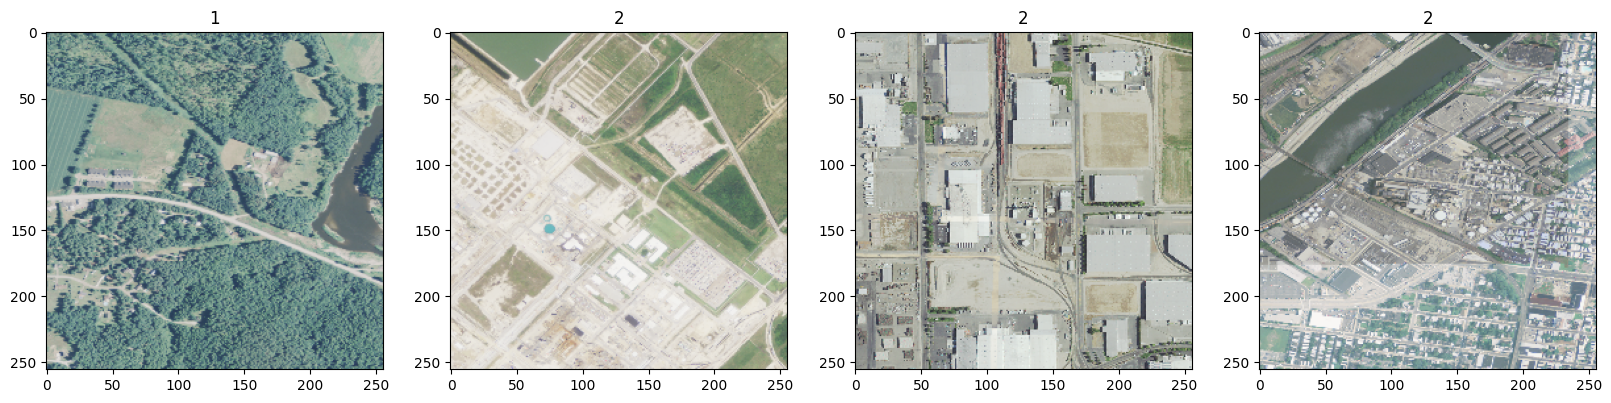

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
scaled = batch[0]/255
scaled.max()

# Scale Data

In [22]:
data = data.map(lambda x,y: (x/255, y))

In [23]:
scaled_iterator = data.as_numpy_iterator()

In [24]:
batch = scaled_iterator.next()

In [26]:
batch[0].min()

0.0

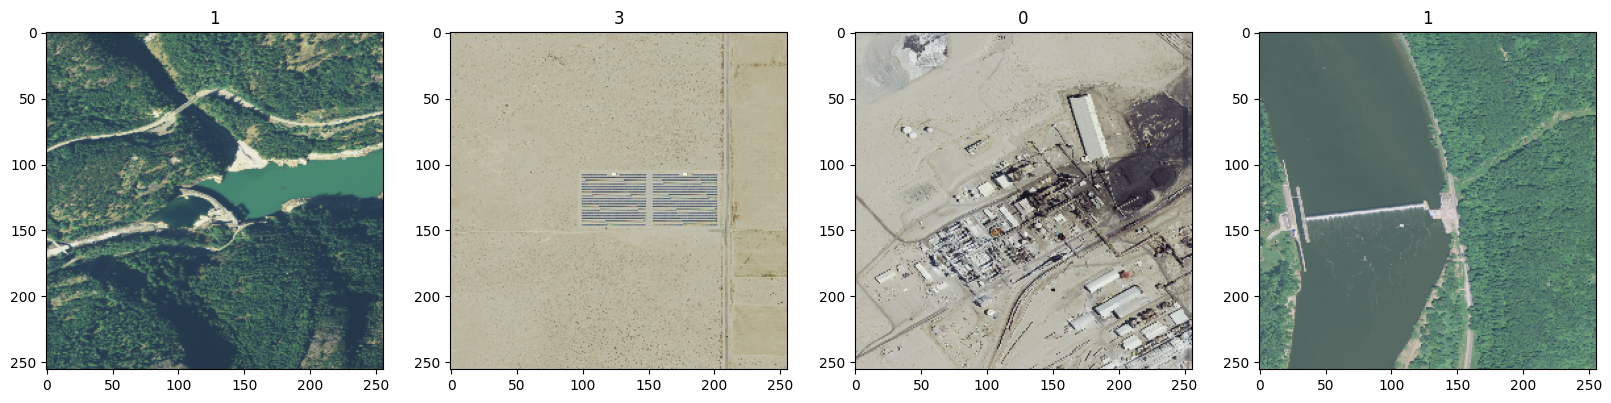

In [27]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# Split Data

In [28]:
len(data)

91

In [29]:
train_size = int(len(data) * 0.6)
val_size = int(len(data) * 0.3) +1
test_size = int(len(data) * 0.1)

In [30]:
train_size+test_size+val_size

91

In [31]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [32]:
len(test)

9

# Build Deep Learning Model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [36]:
model = Sequential([
    Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(4, activation='softmax')
])

In [37]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,802,084 (64.09 MB)

 Trainable params: 16,802,084 (64.09 MB)

 Non-trainable params: 0 (0.00 B)

# Train

In [39]:
logdir='logs'

In [40]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [42]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback, early_stopping_callback])


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 54s 980ms/step - accuracy: 0.3694 - loss: 2.5990 - val_accuracy: 0.4576 - val_loss: 1.0950
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 930ms/step - accuracy: 0.4954 - loss: 1.1086 - val_accuracy: 0.5714 - val_loss: 0.9974
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 925ms/step - accuracy: 0.5306 - loss: 1.0048 - val_accuracy: 0.5759 - val_loss: 0.9213
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 935ms/step - accuracy: 0.6053 - loss: 0.8836 - val_accuracy: 0.6417 - val_loss: 0.8585
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 948ms/step - accuracy: 0.7017 - loss: 0.7161 - val_accuracy: 0.6261 - val_loss: 0.8566
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 944ms/step - accuracy: 0.7693 - loss: 0.5574 - val_accuracy: 0.6674 - val_loss: 0.8423
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 930ms/step - accuracy: 0.8781 - loss: 0.3738 - val_accuracy: 0.6629 - val_loss: 0.9140
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 940ms/step - accuracy: 0.9240 - loss: 0.2442 - val_accu

In [43]:
hist.history

{'accuracy': [0.41956019401550293,
  0.5121527910232544,
  0.5515046119689941,
  0.6163194179534912,
  0.7123842835426331,
  0.7771990895271301,
  0.8692129850387573,
  0.90625],
 'loss': [1.6345497369766235,
  1.0994470119476318,
  0.9721602201461792,
  0.874371349811554,
  0.7102521061897278,
  0.5587112307548523,
  0.38898205757141113,
  0.2678956687450409],
 'val_accuracy': [0.4575892984867096,
  0.5714285969734192,
  0.5758928656578064,
  0.6417410969734192,
  0.6261160969734192,
  0.6674107313156128,
  0.6629464030265808,
  0.6662946343421936],
 'val_loss': [1.095024824142456,
  0.9973523020744324,
  0.9213347434997559,
  0.8584517240524292,
  0.8565784096717834,
  0.8423379063606262,
  0.914002537727356,
  0.9784532189369202]}

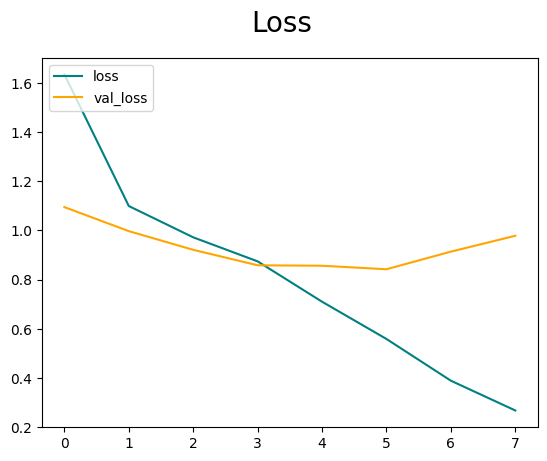

In [44]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

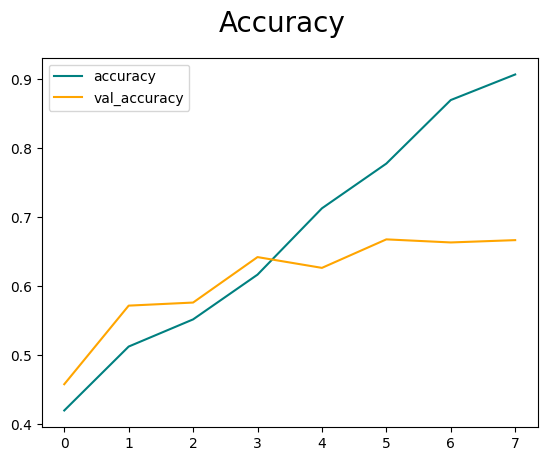

In [45]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [46]:
from tensorflow.keras.metrics import Precision, Recall

In [47]:
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()  

In [49]:
for X, y_true in test.as_numpy_iterator():
    y_pred = model.predict(X)
    y_pred_classes = tf.argmax(y_pred, axis=1)  # Converting softmax outputs to class indices

    accuracy.update_state(y_true, y_pred_classes)
    precision.update_state(y_true, y_pred_classes)
    recall.update_state(y_true, y_pred_classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [50]:
print("Accuracy:", accuracy.result().numpy())
print("Precision:", precision.result().numpy())
print("Recall:", recall.result().numpy())

Accuracy: 0.19029851
Precision: 0.93690246
Recall: 0.98196393


# Test

In [53]:
import cv2

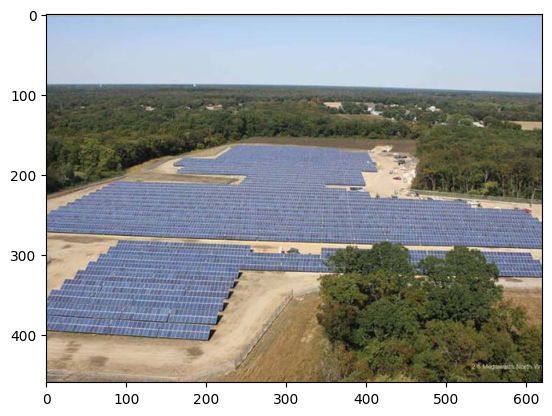

In [55]:
img = cv2.imread('SolarTest.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

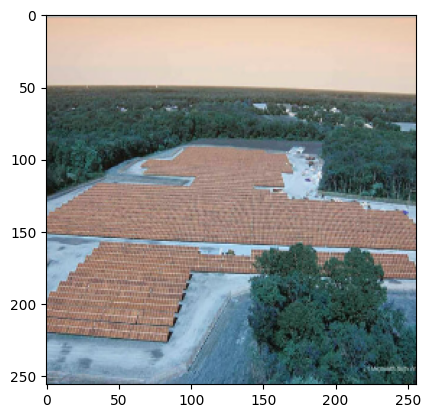

In [56]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [57]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [58]:
yhat

array([[0.19213033, 0.03801479, 0.42162403, 0.34823084]], dtype=float32)

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

# Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))